In [1]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
import rpy2.robjects as robj
import pyreadr
from easydict import EasyDict as edict
from tqdm import tqdm_notebook as tqdm
from pathlib import Path
from scipy.io import loadmat
import sys
import time as Time
import pickle
from pprint import pprint
%matplotlib inline

In [2]:
sys.path.append("/home/huaqingj/MyResearch/TVDN")
from pyTVDN.TVDNutils import *
from pyTVDN import TVDNDetect

In [3]:
resDir = Path("../results")
dataDir = Path("../data")

In [4]:
filname = Path("subj2.mat")
MEG = loadmat(dataDir/filname)["DK_timecourse"]

### Obtain the data

In [5]:
Ymat = MEG[:, ::100]
Ymat3600 = MEG[:, ::10]

### parameters

In [6]:
Lmin = 6
MaxM = 20
kappa = 2.63
r = 8
lamb = 1e-4
d, n = Ymat.shape

In [7]:
MEGdet = TVDNDetect(Ymat=Ymat, saveDir=None, dataType="MEG", showParas=True,  fName="subj2",
                    r=8, kappa=kappa, freq=60, Lmin=Lmin, lamb=lamb, MaxM=MaxM, T=2, decimateRate=None, downRate=1)

The parameters for detection are:
{'Lmin': 6,
 'MaxM': 20,
 'T': 2,
 'decimateRate': None,
 'downRate': 1,
 'fName': 'subj2',
 'fct': 0.5,
 'freq': 60,
 'is_detrend': False,
 'kappa': 2.63,
 'lamb': 0.0001,
 'plotfct': 30,
 'r': 8}


In [8]:
MEGdet()

In [9]:
pprint(MEGdet.finalRes.chgMat)

array([[307.,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,
         inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf],
       [170., 200.,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,
         inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf],
       [141., 182., 266.,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,
         inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf],
       [170., 194., 235., 267.,  inf,  inf,  inf,  inf,  inf,  inf,  inf,
         inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf],
       [141., 182., 247., 288., 326.,  inf,  inf,  inf,  inf,  inf,  inf,
         inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf],
       [140., 181., 218., 247., 288., 326.,  inf,  inf,  inf,  inf,  inf,
         inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf],
       [ 34., 109., 141., 182., 247., 288., 326.,  inf,  inf,  inf,  inf,
         inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf],
       [ 34., 109., 141., 182., 218., 247

In [10]:
print(MEGdet)

+-------------+----------------+--------------------+------+
| Num of CPTs | Estiamted CPTs |        MSE         | Rank |
+-------------+----------------+--------------------+------+
|      0      |       []       | 63163542.279744335 |  8   |
+-------------+----------------+--------------------+------+


In [11]:
kappas = np.linspace(2, 3, 100)
MEGdet.TuningKappa(kappas)

In [12]:
MEGdet.UpdateEcpts(13)

In [13]:
print(MEGdet)

+-------------+--------------------------------------------------------------------+-------------------+------+
| Num of CPTs |                           Estiamted CPTs                           |        MSE        | Rank |
+-------------+--------------------------------------------------------------------+-------------------+------+
|      13     | [ 25.  44.  62.  86. 111. 143. 170. 194. 220. 244. 266. 288. 326.] | 84861176.80548705 |  8   |
+-------------+--------------------------------------------------------------------+-------------------+------+


#### Plot the reconstructed curve of length 360 

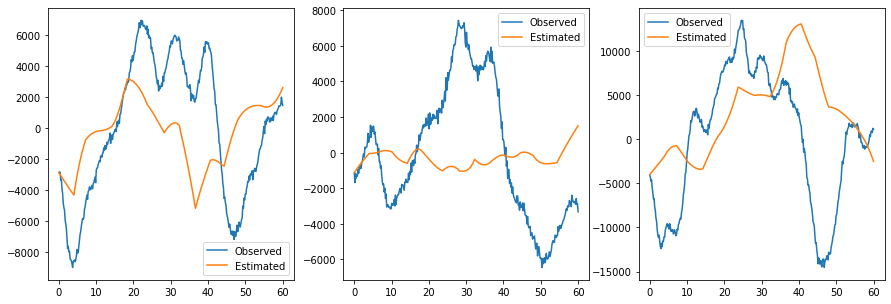

In [17]:
MEGdet.PlotRecCurve([43, 45, 59])

### Reconstructed Xmat of length 3600 from the results based on Ymat of length 360

In [15]:
_, nFull = Ymat3600.shape
time = np.linspace(0, 2, nFull)
tStepFull = np.diff(time)[-1]
adjFct = 10

finalRes = MEGdet.finalRes
midRes = MEGdet.midRes
numChg = 13
ecpts =finalRes.chgMat[numChg-1, :numChg]
ndXmat = midRes.ndXmat
nXmat = midRes.nXmat
kpidxs = midRes.kpidxs
eigVecs = midRes.eigVecs
RecXmat3600 = ReconXmatCV(ecpts, ndXmat, nXmat, kpidxs, eigVecs, Ymat, tStep=tStepFull, r=r, adjFct=adjFct, nFull=nFull, is_full=True) 

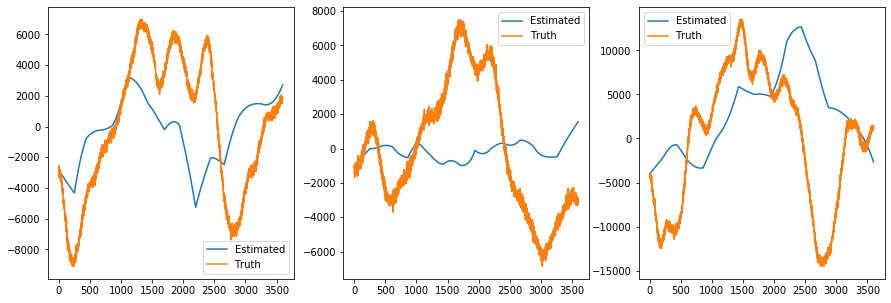

In [16]:
plt.figure(figsize=[15, 5])
plt.subplot(131)
plt.plot(RecXmat3600.EstXmatReal[43, :], label="Estimated")
plt.plot(Ymat3600[43, :], label="Truth")
plt.legend()

plt.subplot(132)
plt.plot(RecXmat3600.EstXmatReal[45, :], label="Estimated")
plt.plot(Ymat3600[45, :], label="Truth")
plt.legend()

plt.subplot(133)
plt.plot(RecXmat3600.EstXmatReal[59, :], label="Estimated")
plt.plot(Ymat3600[59, :], label="Truth")
plt.legend()